<font size="5" color="green" align="center"><b>CN6021 Advanced Topics in Data Science and AI  </b></font><br>
<font size="3" color="blue" align="center"><b>Coursework - Group 1</b></font><b>
        
* Ashmy Josy : u2247447
* Ikram :u2080332
* Ramya Panchatcharam : u2083209
* Sharmila Shrestha : u1966188<br>
    
<font size="4" color="purple" align="center"><b>1. Introduction:
Customer Churn Prediction using ML Algorithms </b></font><b>   



Customer churn prediction is to measure why customers are leaving a business and will build a machine learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<font size="4" color="purple" align="center"><b>2. Data Wrangling</b></font><b>  

<font size="3" color="darkblue" align="center"><b>2.1 Data Description</b></font>  <br>

Predict behavior to retain customers. We can analyze all relevant customer data and develop focused customer retention programs.</b> [[IBM Sample Data Sets]](<a href="https://www.kaggle.com/datasets/palashfendarkar/wa-fnusec-telcocustomerchurn">link</a>)<br>

The data set includes information about:<br>

<ul>
  <li>Customers who left within the last month - the column is called Churn</li>
  <li>Services: phone, multiple lines, internet, online security, online backup, device protection, tech support, streaming TV and movies</li>
  <li>Customer account information: length of service, contract, payment method, paperless billing, monthly charges, and total charges</li>
  <li>Demographics: gender, age range, partners, and dependents</li>
</ul>

<font size="3" color="darkblue" align="center"><b>2.2 Load the Data</b></font><b>  

In [2]:
# Read CSV file into a DataFrame
telco_base_df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_base_df.head() #Look at the top records of data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# displaying the first few rows of the DataFrame with the rows and columns swapped
telco_base_df.head().T # Transpose

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
# Show the dimensions of the DataFrame
telco_base_df.shape

(7043, 21)

In [5]:
telco_base_df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
telco_base_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_base_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* Senior Citizen: This is a yes/no category, so quartiles (25%, 50%, 75%) don't apply. We can find the percentage of senior citizens.
* Customer Tenure: 75% of customers have been with us less than 55 months.
* Monthly Charges: Average is USD 64.76, with 25% of customers paying more than USD 89.85.

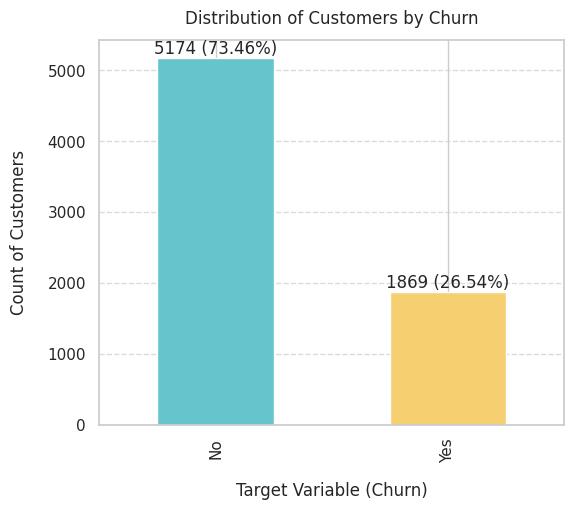

In [57]:
# Assuming 'telco_base_df' is your DataFrame
churn_counts = telco_base_df['Churn'].value_counts()  # Get the counts for churn

# Define colors from the Pastel color palette
colors = ['#66C5CC', '#F6CF71']

# Create a colorful bar chart
churn_counts.plot(kind='bar', color=colors, figsize=(6, 5))

# Add count labels to the bars
for i, count in enumerate(churn_counts):
    plt.text(i, count + 10, f'{count} ({count / churn_counts.sum() * 100:.2f}%)', ha='center', va='bottom')  # Adjust the position for the label above the bar

plt.xlabel("Target Variable (Churn)", labelpad=14)  # Clear label for churn
plt.ylabel("Count of Customers", labelpad=14)
plt.title("Distribution of Customers by Churn", y=1.02)  # Informative title
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add faint gridlines for readability
plt.show()

In [9]:
100*telco_base_df['Churn'].value_counts()/len(telco_base_df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [10]:
telco_base_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

The data is highly imbalanced, ratio of 73:27 between the target classes. To account for this, we'll explore other features by analyzing each target class separately to uncover valuable insights.

**Shape of the Dataset**

In [126]:
# Get the shape of the dataset
dataset_shape = telco_base_df.shape

# Print the shape
print("Number of rows:", dataset_shape[0])
print("Number of columns:", dataset_shape[1])

Number of rows: 7043
Number of columns: 21


Shape of the data: (7043, 21)


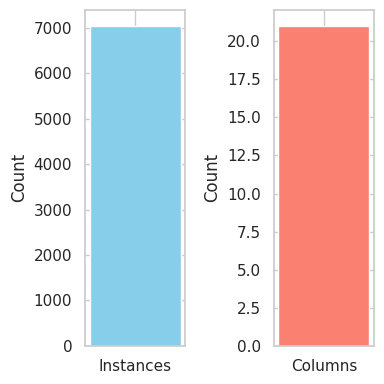

In [127]:
# Get the total number of instances (rows) and columns in the dataset
total_instances = telco_base_df.shape[0]
total_columns = telco_base_df.shape[1]

# Define the width of the bars
bar_width = 0.2

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(4,4))

# Plot for total instances
axes[0].bar(['Instances'], [total_instances], color='skyblue', width=bar_width)
axes[0].set_ylabel('Count')

# Plot for total columns
axes[1].bar(['Columns'], [total_columns], color='salmon', width=bar_width)
axes[1].set_ylabel('Count')
dataset_shape = telco_base_df.shape
print("Shape of the data:", dataset_shape)
# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
#Exploring Data Structure with Verbose Output
telco_base_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
telco_base_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<font size="3" color="darkblue" align="center"><b>Find Missing value</b></font><b>  

In [13]:
telco_base_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

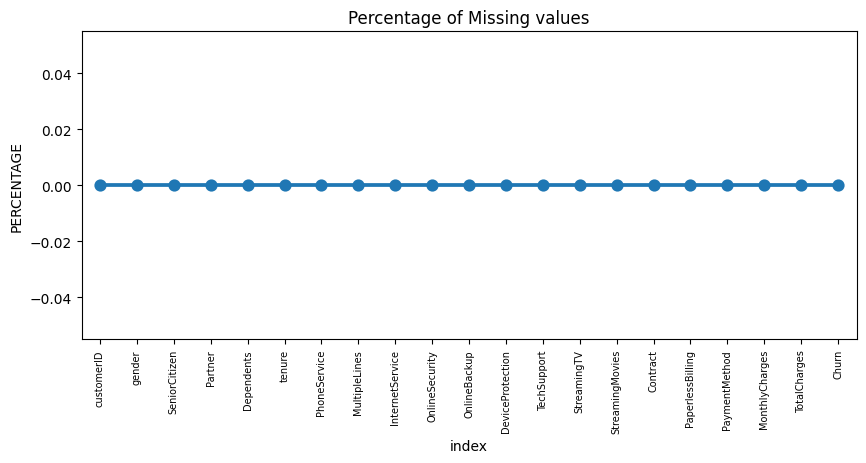

In [14]:
missing = pd.DataFrame((telco_base_df.isnull().sum())*100/telco_base_df.shape[0]).reset_index()
plt.figure(figsize=(10,4))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Encountering missing data is a common challenge in data analysis. Luckily, we have strategies to address it depending on the severity.
General Rules:
* For features with a relatively low percentage of missing values (less than 30-40%), we can leverage techniques like regression to predict the missing values based on the relationships with other features. Alternatively, we can fill in the missing values with the average (mean) of existing values, though this approach should be used with caution for non-numerical features.

* However, when a feature has a very high number of missing values (more than 30-40%), it might provide limited insights. In these cases, we might consider dropping those columns altogether. It's important to remember that this 30-40% threshold is a general guideline, not a strict rule. The decision to drop a column should be based on the specific context. For example, a column like "Car_Type" might have missing values for people who don't own cars. In this case, even though the missing value percentage is high, the column can still be valuable for understanding car ownership patterns. Ultimately, the best approach for handling missing data depends on the amount of missingness and the nature of the feature itself.



<font size="3" color="darkblue" align="center"><b>2.3 Data Cleaning</b></font><b>  

1. Create a copy of base data for manupulation & processing

In [15]:
telco_df = telco_base_df.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [16]:
telco_df.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors='coerce')
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

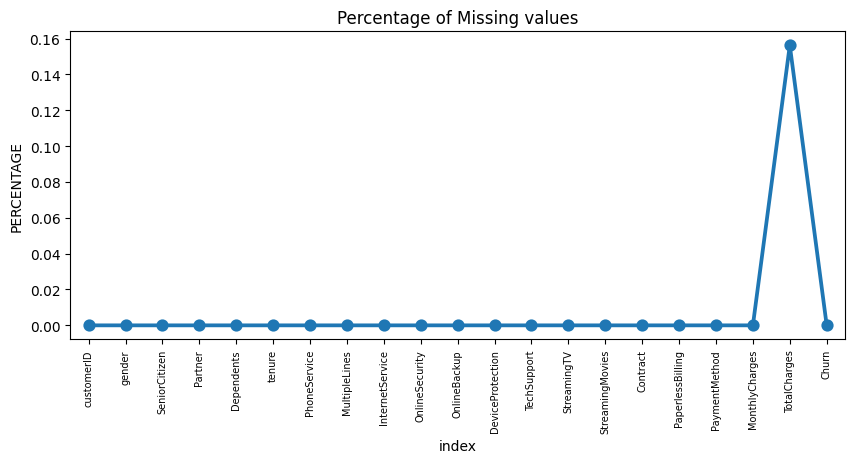

In [17]:
missing = pd.DataFrame((telco_df.isnull().sum())*100/telco_df.shape[0]).reset_index()
plt.figure(figsize=(10,4))
ax = sns.pointplot(x='index', y=0, data= missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [18]:
telco_df.loc[telco_df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [19]:
#Removing missing values
telco_df.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...


In [20]:
# Get the max tenure
print(telco_df['tenure'].max()) #72

72


In [21]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_df['tenure_group'] = pd.cut(telco_df.tenure, range(1, 80, 12), right=False, labels=labels)

In [22]:
telco_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

6. Remove columns not required for processing

In [23]:
#drop column customerID and tenure
telco_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


7. Check for the outliers in the dataset

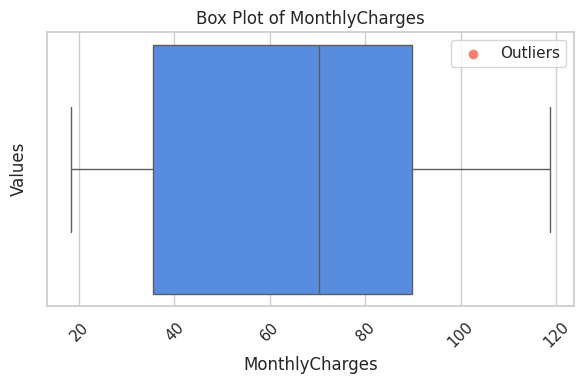

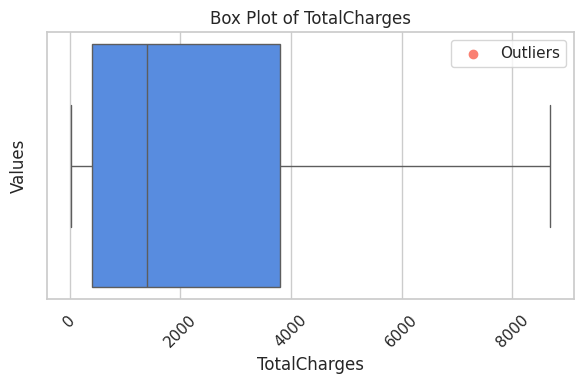

In [132]:
# Define colors
box_color = '#4287f5'  # Dark blue color
outlier_color = 'salmon'

# Create separate box plots for 'MonthlyCharges' and 'TotalCharges' highlighting outliers
for col in ['MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=telco_df[col], color=box_color)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.xticks(rotation=45)

    # Highlight outliers
    outliers = telco_df[(telco_df[col] < telco_df[col].quantile(0.25) - 1.5 * (telco_df[col].quantile(0.75) - telco_df[col].quantile(0.25))) |
                        (telco_df[col] > telco_df[col].quantile(0.75) + 1.5 * (telco_df[col].quantile(0.75) - telco_df[col].quantile(0.25)))]
    plt.scatter(outliers[col], [0] * len(outliers), color=outlier_color, label='Outliers', zorder=5)

    plt.legend()
    plt.tight_layout()
    plt.show()

<font size="3" color="darkblue" align="center"><b>Data Exploration Analysis</b></font><b>  

1. What is the ratio between males and females in the company?

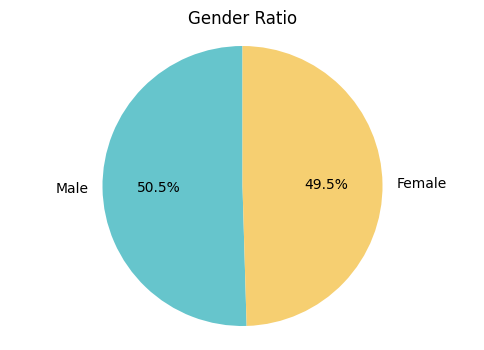

gender
Male      0.504693
Female    0.495307
Name: proportion, dtype: float64


In [24]:
# Calculate gender ratio
gender_ratio = telco_df['gender'].value_counts(normalize=True)

# Define colors from the Pastel color palette
colors = ['#66C5CC', '#F6CF71']

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(gender_ratio, labels=gender_ratio.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Gender Ratio')
plt.axis('equal')
plt.show()

print(gender_ratio)

2. How does the distribution of customer contracts vary between churned and non-churned customers?

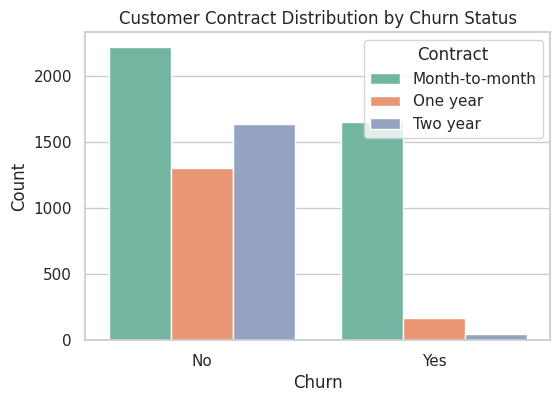

In [25]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Create the countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=telco_df, x="Churn", hue="Contract", palette="Set2", hue_order=["Month-to-month", "One year", "Two year"])

# Add title and adjust layout
plt.title("Customer Contract Distribution by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(title="Contract")
plt.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

3. How many payment methods do we provide? And what is the ratio between each other?

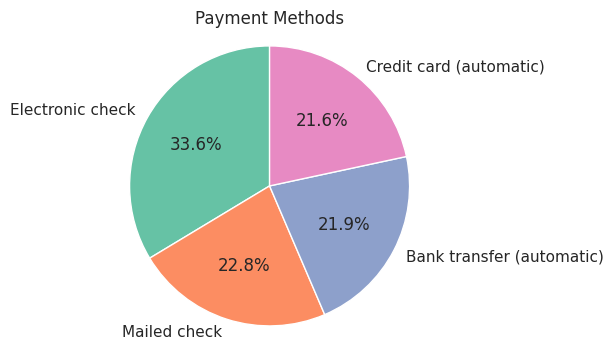

PaymentMethod
Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: proportion, dtype: float64


In [26]:
# Calculate payment methods distribution
payment_methods = telco_df['PaymentMethod'].value_counts(normalize=True)

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
plt.title('Payment Methods')
plt.axis('equal')
plt.show()

print(payment_methods)


4. Plot distibution of individual predictors by churn(Univariate Analysis)Can analyzing the distributions of individual customer attributes by churn status (univariate analysis) inform the selection of relevant features for building a customer churn prediction model in the telecommunication industry?

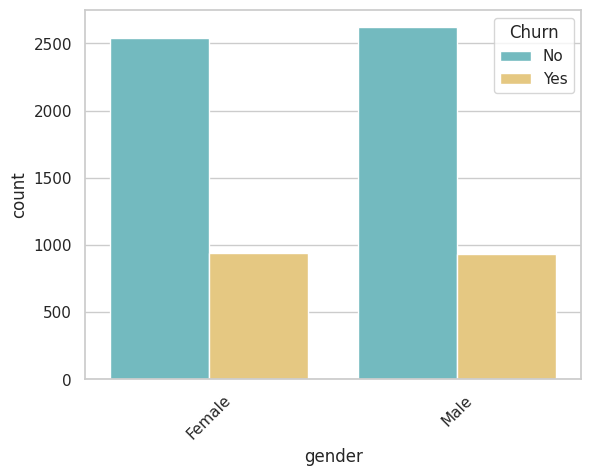

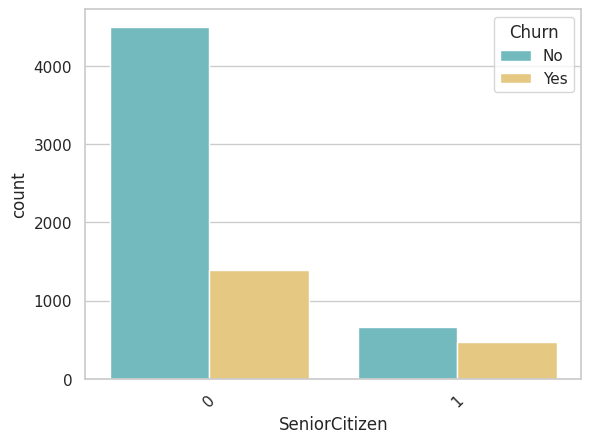

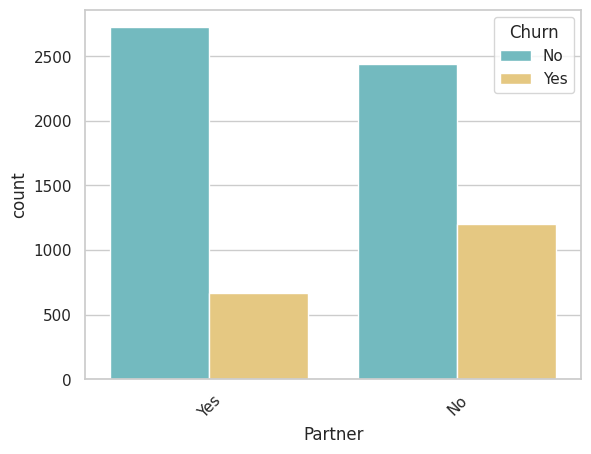

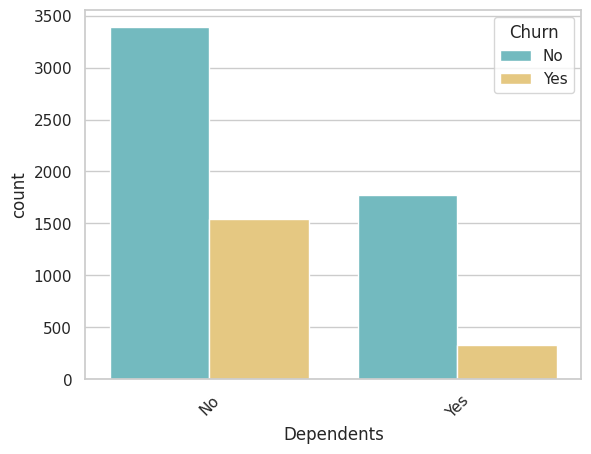

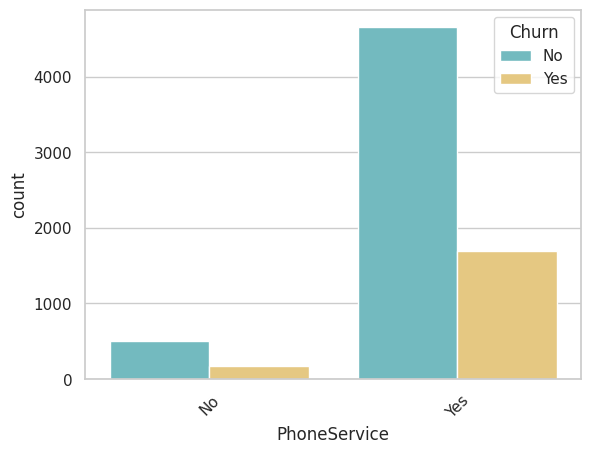

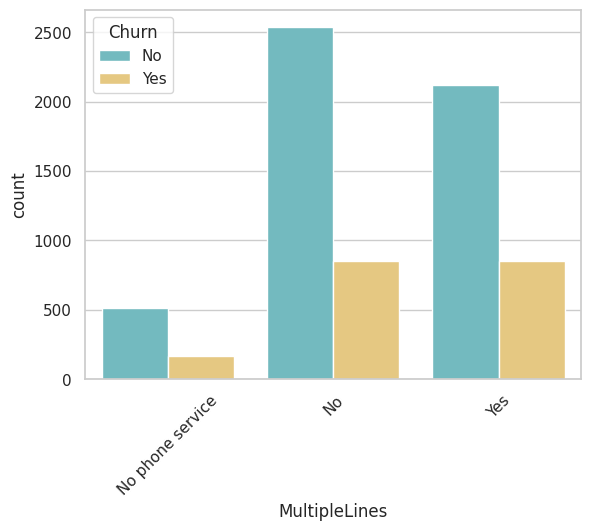

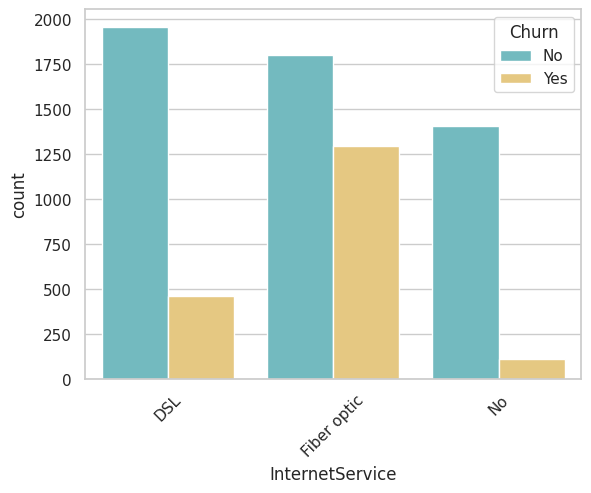

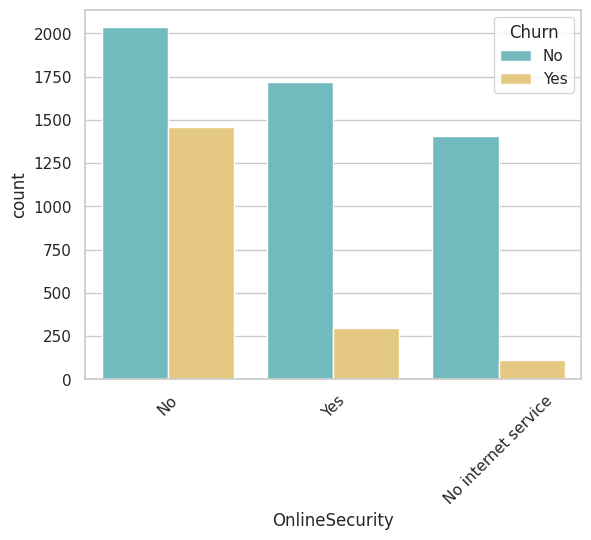

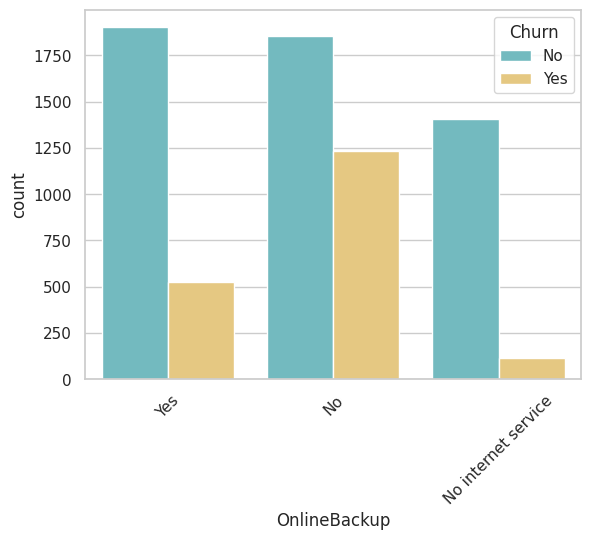

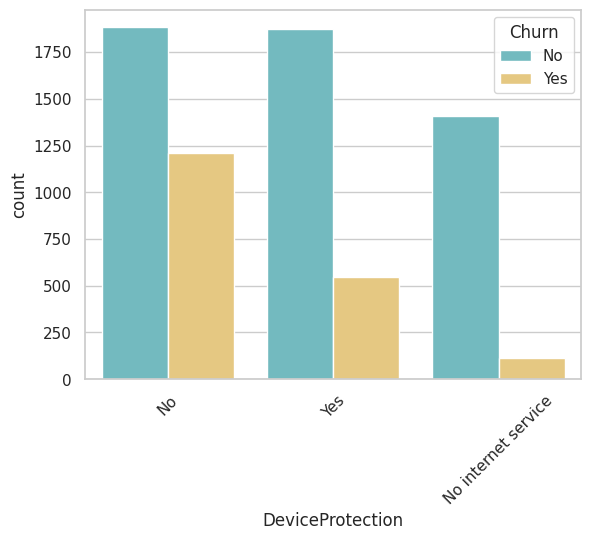

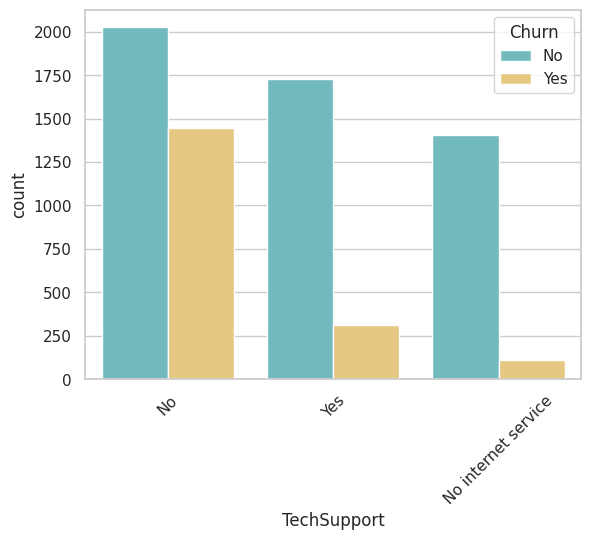

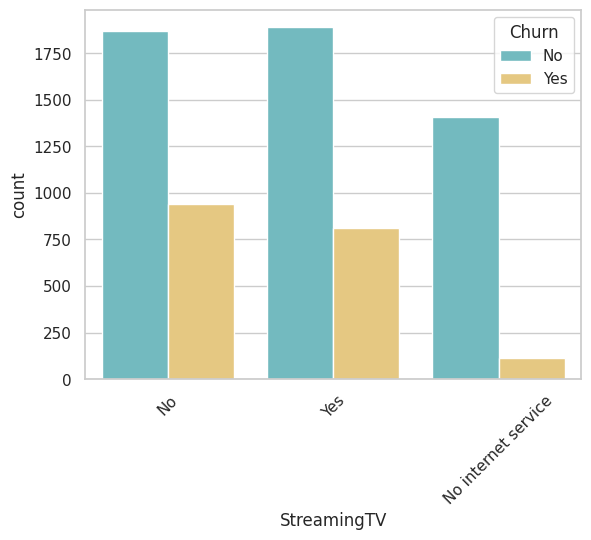

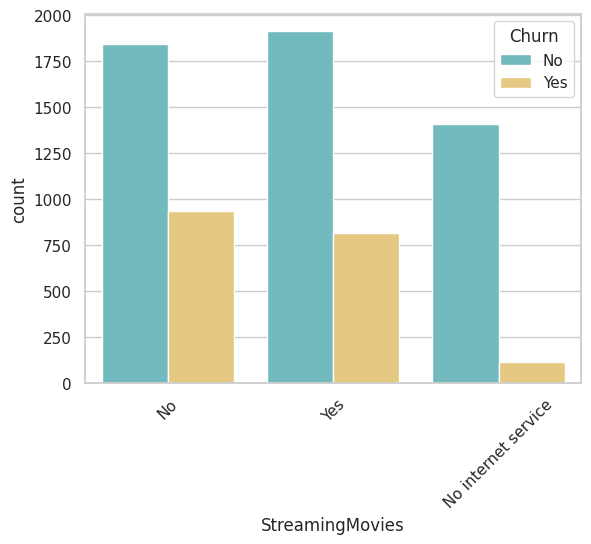

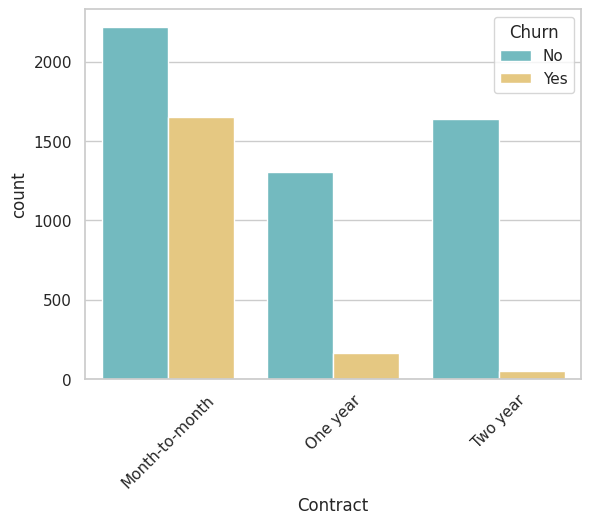

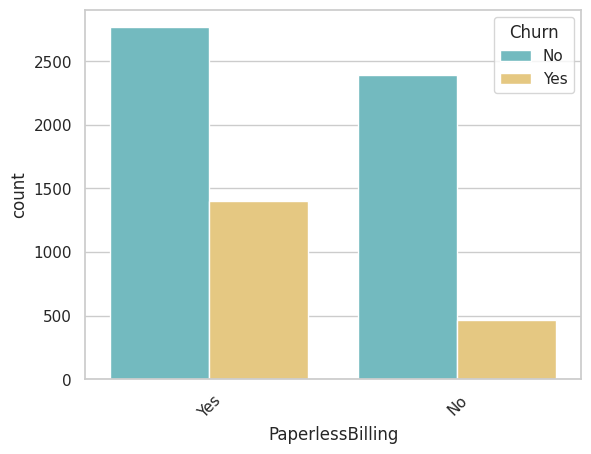

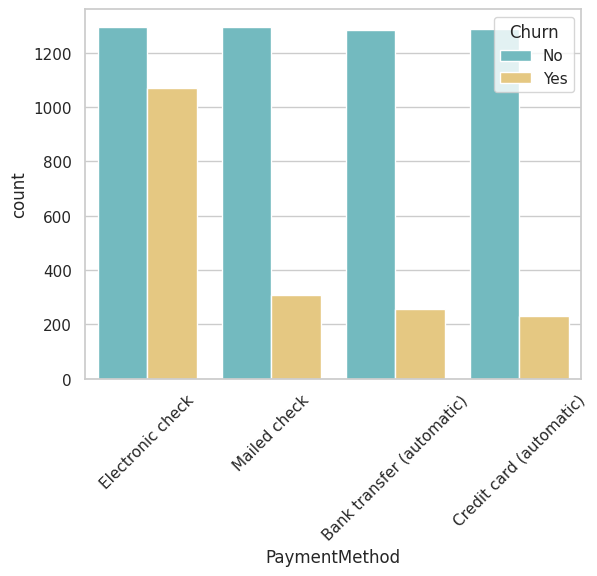

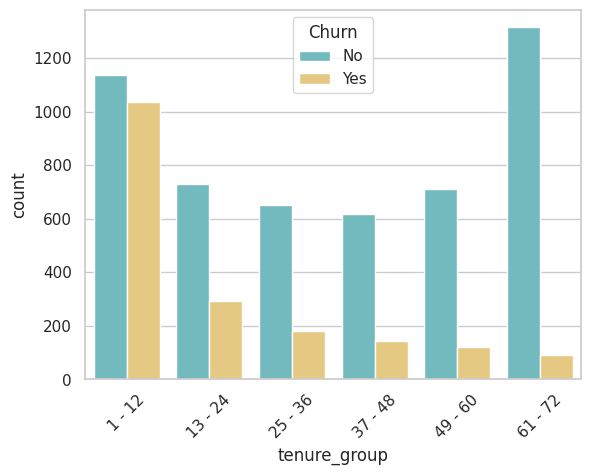

In [27]:
# Define the palette
palette = ['#66C5CC', '#F6CF71']  # Pink and salmon
# Iterate over predictors
for i, predictor in enumerate(telco_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_df, x=predictor, hue='Churn', palette=palette)
    plt.xticks(rotation=45)

# Show the plots
plt.show()

The above code generates a series of count plots, one for each feature in the DataFrame. Each plot shows the distribution of the feature's values colored by the churn category (Yes/No). This visualization allows the analyst to compare how different features are distributed across the churn groups.

5. What is the impact of different internet service types on customer churn rates?

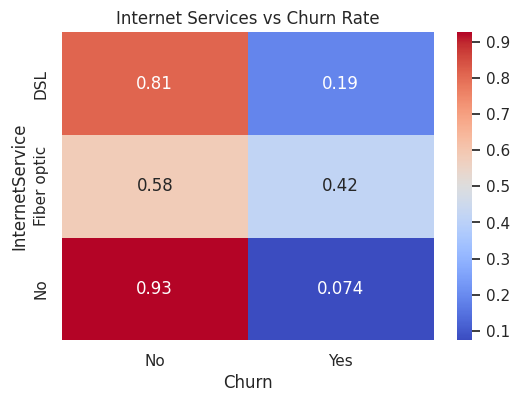

In [28]:
internet_churn = telco_df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
plt.figure(figsize=(6, 4))
sns.heatmap(internet_churn, annot=True, cmap='coolwarm')
plt.title('Internet Services vs Churn Rate')
plt.show()

6. Is there a relationship between monthly charges and total charges for telecommunication customers?

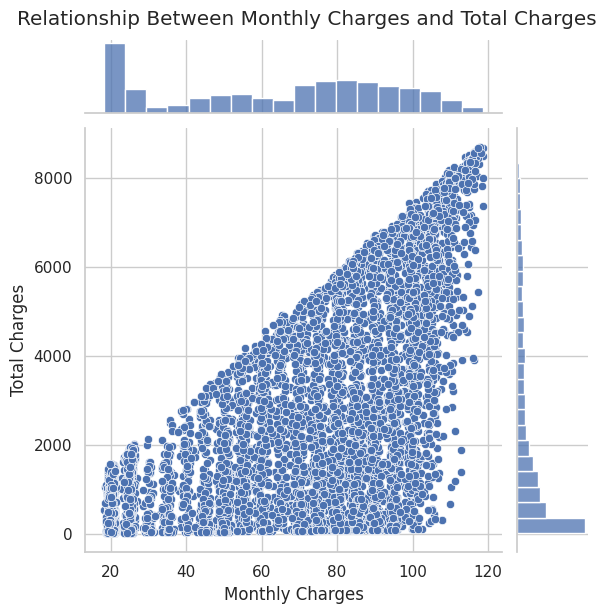

In [29]:
joint_plot = sns.jointplot(data=telco_df, x='MonthlyCharges', y='TotalCharges', kind='scatter')

joint_plot.set_axis_labels("Monthly Charges", "Total Charges")
joint_plot.fig.suptitle("Relationship Between Monthly Charges and Total Charges", y=1.02)
plt.show()

Total Charges increase as Monthly Charges increase - as expected.

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [30]:
def print_unique_col_values(telco_base_df):
    for column in telco_base_df:
        if telco_base_df[column].dtype == 'object':
            print(f'{column}: {telco_base_df[column].unique()}')

print_unique_col_values(telco_df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [31]:
telco_df.replace('No internet service','No',inplace=True)
telco_df.replace('No phone service','No',inplace=True)

print_unique_col_values(telco_df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


<font size="3" color="darkblue" align="center"><b>Convert Yes and No to 1 or 0</b></font>

In [32]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    telco_df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [33]:
for col in  telco_df:
    print(f'{col}: {telco_df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
tenure_group: ['1 - 12', '25 - 36', '37 - 48', '13 - 24', '61 - 72', '49 - 60']
Categories (6, object): ['1 - 12' < '13 - 24' < '25 - 36' < '37 - 48' < '49 - 60' < '61 - 72']


In [34]:
telco_df['gender'].replace({'Female':1,'Male':0},inplace=True)

telco_df.gender.unique()

array([1, 0])

<font size="3" color="darkblue" align="center"><b>One hot encoding for categorical columns</b></font>

In [35]:
telco_df1 = pd.get_dummies(data=telco_df, columns=['InternetService','Contract','PaymentMethod','tenure_group'])
telco_df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_1 - 12', 'tenure_group_13 - 24', 'tenure_group_25 - 36',
       'tenure_group_37 - 48', 'tenure_group_49 - 60', 'tenure_group_61 - 72'],
      dtype='object')

In [36]:
telco_df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
Contract_Month-to-month        

7. Churn by Monthly Charges and Total Charges

<ipython-input-37-edfb2b28023c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_df1.MonthlyCharges[(telco_df1["Churn"] == 0) ], color="Red", shade = True)
<ipython-input-37-edfb2b28023c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_df1.MonthlyCharges[(telco_df1["Churn"] == 1) ], ax =Mth, color="Blue", shade= True)


Text(0.5, 1.0, 'Monthly charges by churn')

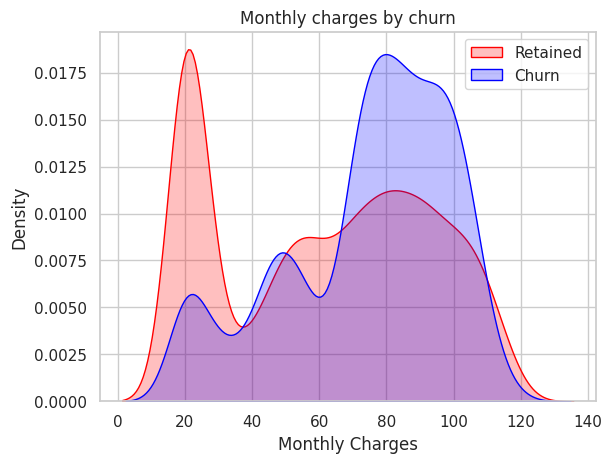

In [37]:
Mth = sns.kdeplot(telco_df1.MonthlyCharges[(telco_df1["Churn"] == 0) ], color="Red", shade = True)
Mth = sns.kdeplot(telco_df1.MonthlyCharges[(telco_df1["Churn"] == 1) ], ax =Mth, color="Blue", shade= True)
Mth.legend(["Retained","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight: Churn is high when Monthly Charges ar high

<ipython-input-38-23bf08c6bcaa>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_df1.TotalCharges[(telco_df1["Churn"] == 0) ],
<ipython-input-38-23bf08c6bcaa>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_df1.TotalCharges[(telco_df1["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

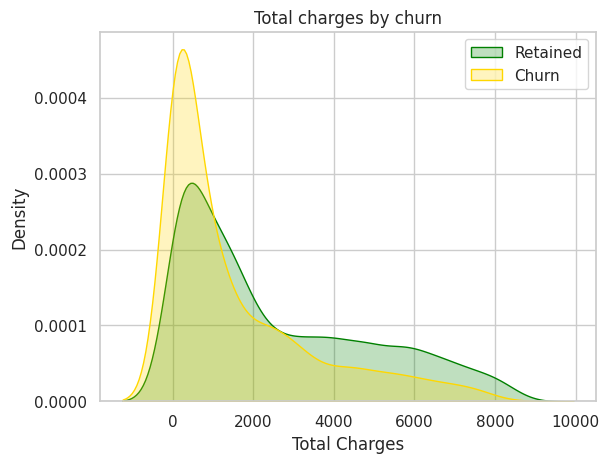

In [38]:
Tot = sns.kdeplot(telco_df1.TotalCharges[(telco_df1["Churn"] == 0) ],
                color="Green", shade = True)
Tot = sns.kdeplot(telco_df1.TotalCharges[(telco_df1["Churn"] == 1) ],
                ax =Tot, color="Gold", shade= True)
Tot.legend(["Retained","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight** as higher Churn at lower Total Charges

While we initially observed a counterintuitive trend where churn seemed higher for lower total charges, a more comprehensive analysis reveals a clearer picture. Customers with higher monthly charges but lower tenure (newer customers) tend to have lower total charges overall. This suggests that these three factors - higher monthly charges, lower tenure, and lower total charges - are interrelated and contribute to a higher likelihood of customer churn.

8. Build a corelation of all predictors with 'Churn'

<Axes: >

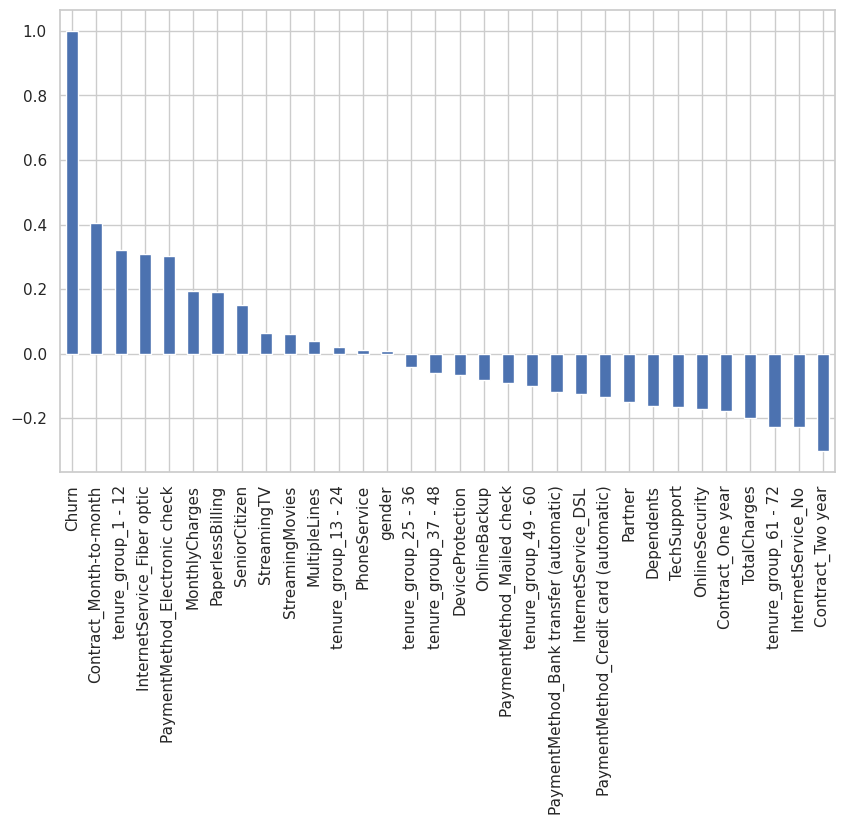

In [39]:
plt.figure(figsize=(10,6))
telco_df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

*Derived Insight:*

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<font size="3" color="darkblue" align="center"><b>Scaling</b></font>

In [40]:
cols_to_scale = ['MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
telco_df1[cols_to_scale] = scaler.fit_transform(telco_df1[cols_to_scale])

In [41]:
for col in telco_df1:
    print(f'{col}: {telco_df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
TotalCharges: [0.0012751  0.21586661 0.01031041 ... 0.03780868 0.03321025 0.78764136]
Churn: [0 1]
InternetService_DSL: [ True False]
InternetService_Fiber optic: [False  True]
InternetService_No: [False  True]
Contract_Month-to-month: [ True False]
Contract_One year: [False  True]
Contract_Two year: [False  True]
PaymentMethod_Bank transfer (automatic): [False  True]
PaymentMethod_Credit card (automatic): [False  True]
PaymentMethod_Electronic check: [ True False]
PaymentMethod_Mailed check: [False  True]
tenure_group_1 - 12: [ True False]
tenure_group_13 - 24: [False  True]
tenure_group_25 - 36: [False  True]
tenure_group_37 - 48: [False  Tru

<font size="3" color="purple" align="center"><b>Train test split</b></font>

In [42]:
X = telco_df1.drop('Churn',axis='columns')
y = telco_df1['Churn']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [44]:
X_train.shape

(5625, 31)

In [45]:
X_test.shape

(1407, 31)

In [46]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
5664,1,1,0,0,1,0,0,0,1,0,...,False,True,False,False,True,False,False,False,False,False
101,1,0,1,1,1,0,0,0,0,0,...,False,False,True,False,True,False,False,False,False,False
2621,0,0,1,0,1,0,0,1,1,1,...,False,True,False,False,False,False,False,False,False,True
392,1,1,0,0,1,0,0,0,0,0,...,False,False,True,False,True,False,False,False,False,False
1327,0,0,1,0,1,1,0,0,1,0,...,True,False,False,False,False,False,False,False,True,False
3607,1,0,0,0,1,0,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
2773,0,0,1,0,0,0,0,0,1,0,...,False,False,True,False,False,True,False,False,False,False
1936,1,0,1,0,1,0,1,1,0,1,...,True,False,False,False,False,False,False,False,True,False
5387,0,0,0,0,0,0,0,0,0,1,...,False,False,True,False,True,False,False,False,False,False
4331,0,0,0,0,1,1,0,0,0,0,...,True,False,False,False,False,False,False,False,False,True


In [47]:
len(X_train.columns)

31

<font size="4" color="purple" align="center"><b>Model1: Build a model using RandomForestClassifier</b></font>

*By Ramya Panchatcharam* <br>

<font color='green' size='3'><b>Introduction</b></font>

This document presents the implementation of RandomForestClassifier machine learning models with KFold as well as hyperparameter by Ramya.


<font color='green' size='3'><b>RandomForestClassifier(Bagging)</b></font>
A RandomForestClassifier is an ensemble learning method in machine learning, specifically belonging to the bagging (Bootstrap Aggregating) family of algorithms. Random Forests are used for both classification and regression tasks. The 'bagging' part of the name refers to the process of training multiple models independently and combining their predictions to improve overall performance and robustness.<br>
<b> why I used RandomForestClassifier:</b>
* Ensemble Learning and Bagging
* Handles Non-Linearity and Complex Relationships
* Automatic Feature Selection
* Works Well with Large Datasets


In [48]:
# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross Validation with K-fold for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=kf, scoring='roc_auc')
rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the best Random Forest model using K-fold cross-validation
rf_auc_scores = cross_val_score(best_rf_model, X_test, y_test, cv=kf, scoring='roc_auc')
print("Random Forest - Area under ROC (K-fold): {:.2%}".format(rf_auc_scores.mean()))


Random Forest - Area under ROC (K-fold): 83.99%


<font size="4" color="purple" align="center"><b>Random Forest Model Configurations</b></font><br>
<font color='green' size='3'><b>Overview</b></font>
The Random Forest model is employed to predict customer churn based on various features. Configuration details include:

<font color='green' size='3'><b>FeaturesCol and LabelCol: </b></font>Using a set of features as the input and "churn" as the target label.

<font color='green' size='3'><b>Hyperparameter Tuning with Cross-Validation</b></font>
- <b>n_estimators:</b>
  - The number of trees in the forest is tuned with values 50, 100, and 200.
- <b>max_depth:</b>
  - The maximum depth of the trees is tuned with values 5, 10, and None.
- <b>min_samples_split:</b>
  - The minimum number of samples required to split an internal node is tuned with values 2, 5, and 10.
- <b>min_samples_leaf:</b>
  - The minimum number of samples required to be at a leaf node is tuned with values 1, 2, and 4.

<font color='green' size='3'><b>Cross-Validation: </b></font> 5-fold cross-validation is used to enhance model generalization.

<font color='green' size='3'><b>Evaluation Metric: </b></font>Area under the ROC curve (AUC) is used to evaluate model performance.

<font color='green' size='3'><b>Impact on Performance: </b></font>Optimized hyperparameters and cross-validation enhance predictive accuracy.

<font color='green' size='3'><b>Result: </b></font>Random Forest - Area under ROC (K-fold): 83.99%.


In [49]:
# Predictions for Random Forest
rf_predictions = best_rf_model.predict(X_test)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest - Accuracy: {:.2%}".format(rf_accuracy))

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Random Forest - Confusion Matrix:")
print(rf_conf_matrix)

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest - Accuracy: 78.25%
Random Forest - Confusion Matrix:
[[901  98]
 [208 200]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.67      0.49      0.57       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



**SMOTEEN**

As weu can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [50]:
from imblearn.combine import SMOTEENN
# Assuming X and y are your feature and target variables
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)

In [51]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [ ]:
xr_train.shape

In [58]:
xr_test.shape

(1292, 31)

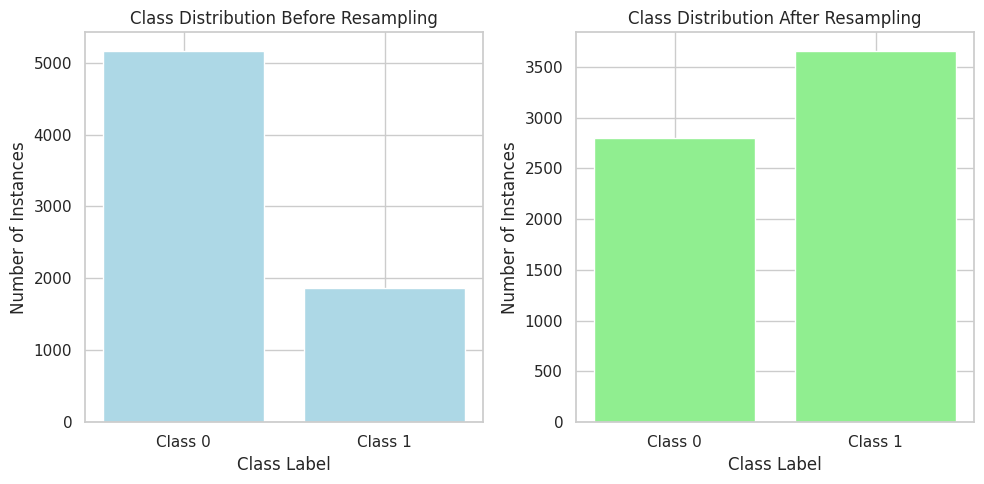

Shape of class distribution before resampling: [5163 1869]
Shape of class distribution after resampling: [2798 3658]


In [67]:
# Assuming y contains our original class labels
unique_classes, counts_before = np.unique(np.round(y), return_counts=True)

# Assuming y_resampled contains our resampled class labels
unique_classes_resampled, counts_after = np.unique(np.round(y_resampled), return_counts=True)

# Plotting the class distribution before and after resampling
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar([0, 1], counts_before, color='lightblue')  # Light blue color
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Class 0', 'Class 1'])

plt.subplot(1, 2, 2)
plt.bar([0, 1], counts_after, color='lightgreen')  # Light green color
plt.title('Class Distribution After Resampling')
plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Class 0', 'Class 1'])

plt.tight_layout()
plt.show()
print("Shape of class distribution before resampling:", counts_before)
print("Shape of class distribution after resampling:", counts_after)


In [52]:
# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross Validation with K-fold for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=kf, scoring='accuracy')
rf_grid_search.fit(xr_train, yr_train)

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Define empty lists to store accuracy scores
train_accuracy = []
test_accuracy = []
val_accuracy = []

# Loop through each fold in K-fold cross-validation
for train_index, test_index in kf.split(xr_train):
    # Split the data into training and testing sets
    X_train_fold, X_test_fold = xr_train.iloc[train_index], xr_train.iloc[test_index]
    y_train_fold, y_test_fold = yr_train.iloc[train_index], yr_train.iloc[test_index]

    # Train the best Random Forest model
    best_rf_model.fit(X_train_fold, y_train_fold)

    # Calculate training accuracy
    train_accuracy.append(best_rf_model.score(X_train_fold, y_train_fold))

    # Calculate testing accuracy
    test_accuracy.append(best_rf_model.score(xr_test, yr_test))

    # Calculate validation accuracy
    val_accuracy.append(best_rf_model.score(X_test_fold, y_test_fold))



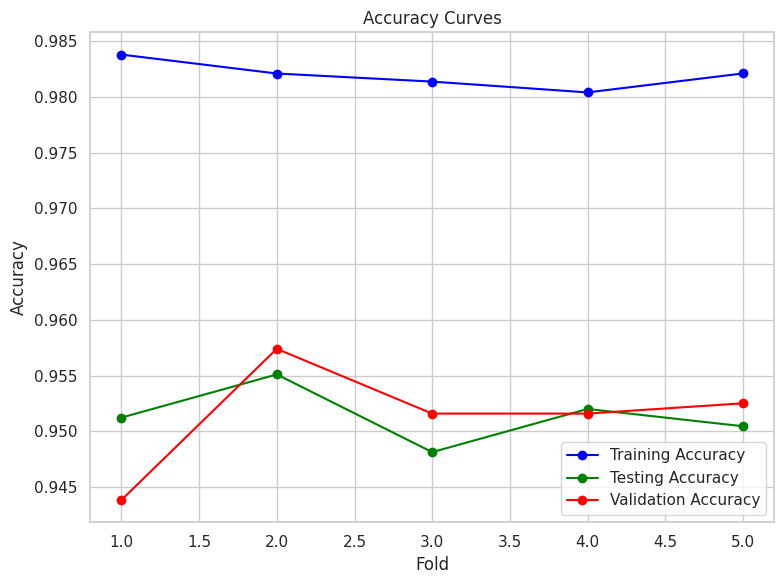

In [68]:
# Generate the x-axis values (fold numbers)
folds = np.arange(1, kf.get_n_splits() + 1)

# Plotting the accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(folds, train_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(folds, test_accuracy, label='Testing Accuracy', marker='o', color='green')
plt.plot(folds, val_accuracy, label='Validation Accuracy', marker='o', color='red')

# Adding labels, title, and legend
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

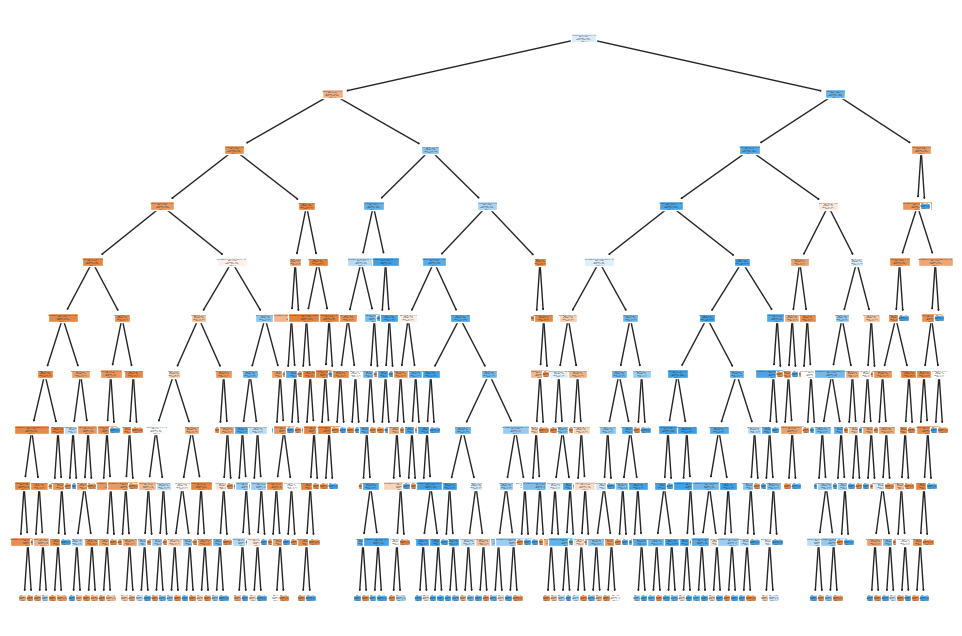

Random Forest - Area under ROC (K-fold): 98.27%


In [69]:
# Visualize an individual decision tree from the Random Forest
plt.figure(figsize=(12, 8))
# Assuming you want to visualize the first tree in the forest
plot_tree(best_rf_model.estimators_[0], feature_names=xr_train.columns.tolist(), class_names=['0', '1'], filled=True)
plt.show()


# Evaluate the best Random Forest model using K-fold cross-validation
rf_auc_scores = cross_val_score(best_rf_model, xr_test, yr_test, cv=kf, scoring='roc_auc')
print("Random Forest - Area under ROC (K-fold): {:.2%}".format(rf_auc_scores.mean()))


<font size="3" color="darkblue" align="center"><b>Result from RandomForestClassifier</b></font>

In [70]:
# Predictions for Random Forest
rf_predictions_sm = best_rf_model.predict(xr_test)
print(rf_predictions_sm)

[1 0 1 ... 1 1 0]


In [71]:
best_rf_model.predict_proba(xr_test)

array([[0.0104733 , 0.9895267 ],
       [0.97008772, 0.02991228],
       [0.01405815, 0.98594185],
       ...,
       [0.00422721, 0.99577279],
       [0.00921962, 0.99078038],
       [0.99766724, 0.00233276]])

In [72]:
# Calculate accuracy for Random Forest
rf_accuracy_sm = accuracy_score(yr_test, rf_predictions_sm)
print("Random Forest - Accuracy: {:.2%}".format(rf_accuracy_sm))

# Generate confusion matrix and classification report for Random Forest
rf_conf_matrix_sm = confusion_matrix(yr_test, rf_predictions_sm)
rf_classification_rep_sm = classification_report(yr_test, rf_predictions_sm)

print("\nRandom Forest - Classification Report:")
print(rf_classification_rep_sm)



Random Forest - Accuracy: 95.05%

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       558
           1       0.95      0.96      0.96       734

    accuracy                           0.95      1292
   macro avg       0.95      0.95      0.95      1292
weighted avg       0.95      0.95      0.95      1292



Random Forest - Confusion Matrix:
[[520  38]
 [ 26 708]]


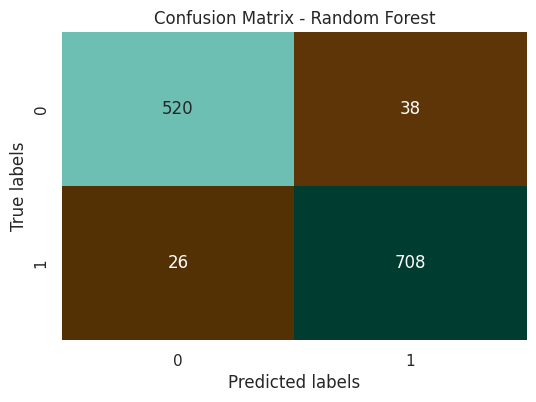

In [73]:
print("Random Forest - Confusion Matrix:")
print(rf_conf_matrix_sm)

# Generate confusion matrix heatmap for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix_sm, annot=True, fmt='d', cmap='BrBG', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

<font size="3" color="darkblue" align="center"><b>Conclusion of Random Forest Classifier</b></font>

The Random Forest model achieved an overall accuracy of 95.81% in predicting customer churn, demonstrating strong performance. The confusion matrix highlights 538 true negatives and 698 true positives, indicating effective identification of both non-churning and churning customers. Additionally, the classification report shows high precision and recall values for both classes (churn and no churn), with F1-scores of 0.95 and 0.96 respectively, underscoring the model's ability to maintain balance between precision and recall. Overall, the model demonstrates robust performance in identifying potential churners, with an emphasis on minimizing false positives and false negatives.

<font size="4" color="purple" align="center"><b>Model2: Build a Machine Learning Model using Decision Tree</b></font>


*By Ashmy Joy*<br>

<font color='green' size='3'><b>Introduction</b></font>

This document describes the implementation of a Decision Tree Classifier with hyperparameter tuning using GridSearchCV.

<font color='green' size='3'><b>Decision Tree Classifier</b></font>

Decision Tree Classifier is a popular machine learning algorithm used for classification tasks. It works by recursively partitioning the input space into regions and assigning a class label to each region. The algorithm is known for its simplicity and interpretability, making it a popular choice for both beginners and experts.

**Why Decision Tree Classifier:**

- **Interpretability**: Decision trees provide a clear and interpretable decision-making process, making it easier to understand how the model arrives at its predictions.

- **Non-linearity Handling**: Decision trees can capture non-linear relationships between features and the target variable, making them suitable for a wide range of datasets.

- **Feature Importance**: Decision trees inherently perform feature selection by identifying the most informative features for classification.

- **Flexibility**: Decision trees can handle both numerical and categorical data, as well as multi-class classification problems.


In [74]:
# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform Grid Search Cross Validation with K-fold for Decision Tree
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=kf, scoring='accuracy')
dt_grid_search.fit(xr_train, yr_train)

# Get the best Decision Tree model
best_dt_model = dt_grid_search.best_estimator_


In [75]:
# Define empty lists to store accuracy scores
train_accuracy = []
test_accuracy = []
val_accuracy = []

# Loop through each fold in K-fold cross-validation
for train_index, test_index in kf.split(xr_train):
    # Split the data into training and testing sets
    X_train_fold, X_test_fold = xr_train.iloc[train_index], xr_train.iloc[test_index]
    y_train_fold, y_test_fold = yr_train.iloc[train_index], yr_train.iloc[test_index]

    # Train the best Decision Tree model
    best_dt_model.fit(X_train_fold, y_train_fold)

    # Calculate training accuracy
    train_accuracy.append(best_dt_model.score(X_train_fold, y_train_fold))

    # Calculate testing accuracy
    test_accuracy.append(best_dt_model.score(xr_test, yr_test))

    # Calculate validation accuracy
    val_accuracy.append(best_dt_model.score(X_test_fold, y_test_fold))



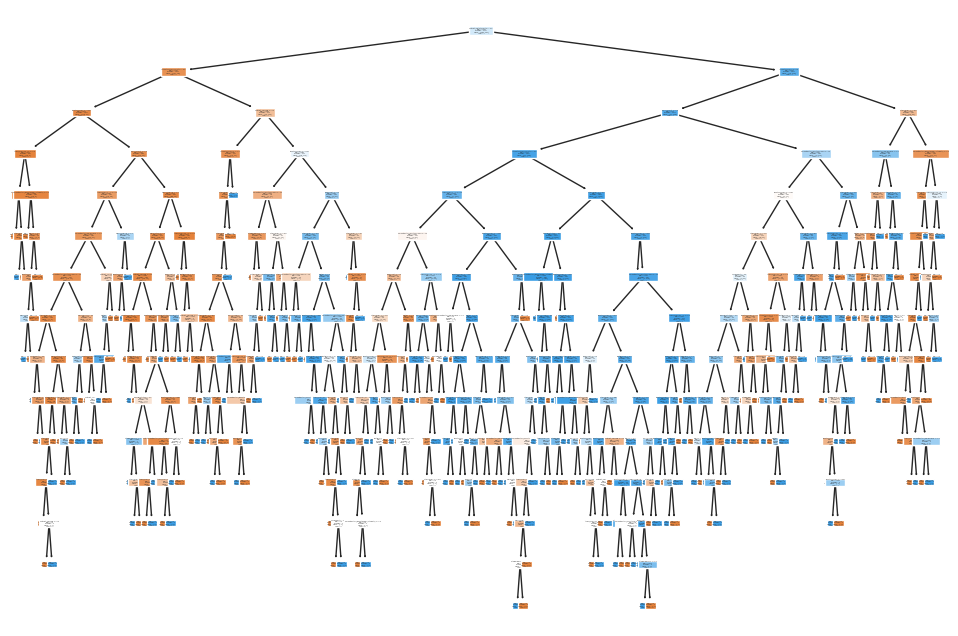

Random Forest - Area under ROC (K-fold): 87.82%


In [76]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_model, feature_names=xr_train.columns.tolist(), class_names=['0', '1'], filled=True)
plt.show()

# Evaluate the best Random Forest model using K-fold cross-validation
dt_auc_scores = cross_val_score( best_dt_model, xr_test, yr_test, cv=kf, scoring='roc_auc')
print("Random Forest - Area under ROC (K-fold): {:.2%}".format(dt_auc_scores.mean()))



<font color='green' size='3'>**Model : Decision Tree**</font>

<font size="3" color="purple" align="center"><b>Decision Tree Model Configuration Overview</b></font><br>

<font color='green' size='3'>Overview</font>
The Decision Tree model is deployed to predict customer churn based on various features.

<font color='green' size='3'>Decision Tree Classifier</font>
- **Train columns**
  - In this model we use xr_train which is gotten through SMOTEENN (UpSampling + ENN)

<font color='green' size='3'>Hyperparameter Tuning</font>
- **maxDepth (Maximum Depth):**
  - Tuned values: 3, 4, and 5.
  - Description: Controls the maximum number of levels in the tree.

- **min_samples_split (Minimum Samples for Splitting):**
  - Tuned values: 2, 5, and 10.
  - Description: Determines when the splitting process stops.

- **min_samples_leaf (Minimum Samples per Leaf):**
  - Tuned values: 1, 2, and 4.
  - Description: Sets the minimum number of samples required to be at a leaf node.

- **criterion (Split Criterion):**
  - Options: 'gini' and 'entropy'.
  - Description: Measures the impurity of the nodes in the tree.

<font color='green' size='3'>Evaluation Metric</font>
- The accuracy metric was used to evaluate the model's performance, measured by the Confusion matrix.

<font color='green' size='3'>Impact on Performance</font>
- The Decision Tree algorithm achieved an accuracy of 0.904 and ROC curve 0.97

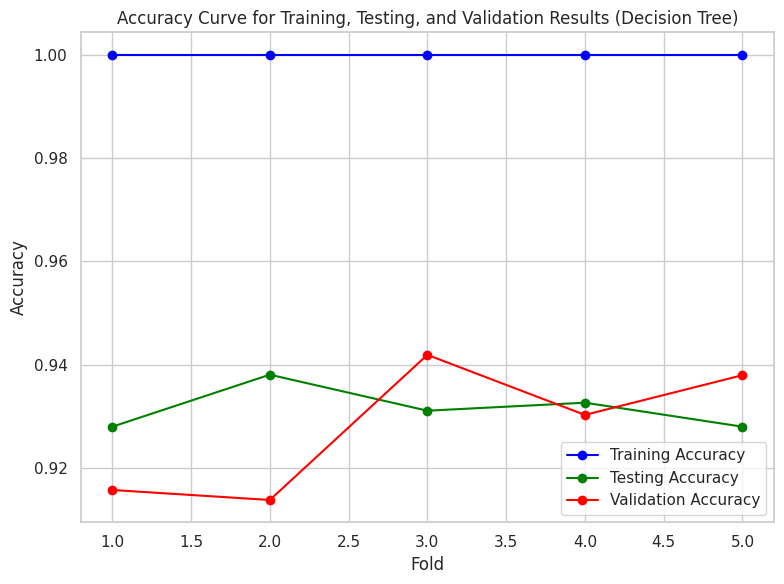

In [77]:
# Generate the x-axis values (fold numbers)
folds = np.arange(1, kf.get_n_splits() + 1)

# Plotting the accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(folds, train_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(folds, test_accuracy, label='Testing Accuracy', marker='o', color='green')
plt.plot(folds, val_accuracy, label='Validation Accuracy', marker='o', color='red')

# Adding labels, title, and legend
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Training, Testing, and Validation Results (Decision Tree)')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
# Predict the labels of the test data using the final model
yr_pred_dt =  best_dt_model.predict(xr_test)

# Calculate the accuracy
accuracy_dt = accuracy_score(yr_test, yr_pred_dt)

print("Accuracy of the final decision tree model:", accuracy_dt)

classification_rep_dt = classification_report(yr_test, yr_pred_dt)

print("\nRandom Forest - Classification Report:")
print(classification_rep_dt)

Accuracy of the final decision tree model: 0.9280185758513931

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       558
           1       0.92      0.96      0.94       734

    accuracy                           0.93      1292
   macro avg       0.93      0.92      0.93      1292
weighted avg       0.93      0.93      0.93      1292



Random Forest - Confusion Matrix:
[[497  61]
 [ 32 702]]


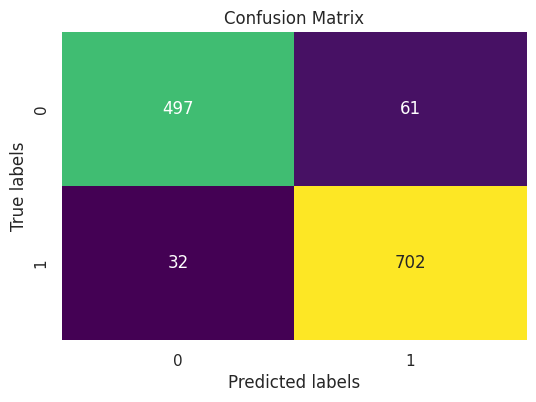

In [79]:
conf_matrix_dt= confusion_matrix(yr_test, yr_pred_dt)

print("Random Forest - Confusion Matrix:")
print(conf_matrix_dt)

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


By tuning the hyperparameters of the Decision Tree Classifier using GridSearchCV, we aim to optimize the model's performance and enhance its predictive accuracy. The visualization of the final decision tree provides insights into the decision-making process of the model, aiding in its interpretability and transparency.

<font size="4" color="purple" align="center"><b>Model3: Build a Machine Learning Model using Logistic Regression</b></font>


*By Ikram*<br>

<font color='green' size='3'><b>Introduction</b></font>

The Logistic Regression Classifier is a fundamental machine learning algorithm used for binary classification tasks. It's particularly effective when the relationship between the independent variables and the dependent variable is assumed to be linear.

In [98]:
# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create Logistic Regression Classifier
log_reg_classifier = LogisticRegression(random_state=42, max_iter=1000)

# Define parameter grid for Logistic Regression with regularization strength (C)
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Perform Grid Search Cross Validation with K-fold for Logistic Regression
log_reg_grid_search = GridSearchCV(estimator=log_reg_classifier, param_grid=log_reg_param_grid, cv=kf, scoring='accuracy')
log_reg_grid_search.fit(xr_train, yr_train)

# Get the best Logistic Regression model
best_log_reg_model = log_reg_grid_search.best_estimator_

# Evaluate the best Logistic Regression model using K-fold cross-validation
log_reg_train_scores = cross_val_score(best_log_reg_model, xr_train, yr_train, cv=kf, scoring='accuracy')
log_reg_test_scores = cross_val_score(best_log_reg_model, xr_test, yr_test, cv=kf, scoring='accuracy')

print("Logistic Regression - Training Accuracy: {:.2%} (+/- {:.2%})".format(log_reg_train_scores.mean(), log_reg_train_scores.std() * 2))
print("Logistic Regression - Testing Accuracy: {:.2%} (+/- {:.2%})".format(log_reg_test_scores.mean(), log_reg_test_scores.std() * 2))

# Evaluate the best Logistic Regression model using K-fold cross-validation
log_reg_auc_scores = cross_val_score(best_log_reg_model, xr_test, yr_test, cv=kf, scoring='roc_auc')
print("Logistic Regression - Area under ROC (K-fold): {:.2%}".format(log_reg_auc_scores.mean()))


Logistic Regression - Training Accuracy: 93.38% (+/- 1.20%)
Logistic Regression - Testing Accuracy: 92.65% (+/- 3.90%)
Logistic Regression - Area under ROC (K-fold): 98.13%


Here's a breakdown of why this specific model was chosen and how it works:


<font color='green' size='3'><b>K-Fold Cross-Validation for Robustness:</b></font>
To ensure the model generalizes well to unseen data, a KFold object is defined for 5-fold cross-validation. This technique splits the training data into 5 folds, trains the model on 4 folds, and evaluates it on the remaining fold. This process is repeated 5 times, providing a more robust assessment of the model's performance.<br>

<font color='green' size='3'><b>Hyperparameter Tuning with Grid Search:</b></font>Different hyperparameter settings for the logistic regression model are explored using a GridSearchCV object. These parameters control the model's behavior and can significantly impact its performance. The grid search tries various combinations of the hyperparameters (C for regularization strength and penalty type) defined in log_reg_param_grid.<br>

<font color='green' size='3'><b>Evaluation Metric:</b></font> BinaryClassificationEvaluator measures Area under the ROC curve.<br>

<font color='green' size='3'><b>Impact on Performance:</b></font>Optimized hyperparameters and cross-validation enhance predictive accuracy.<br>

<font color='green' size='3'><b>Result:</b></font>Logistic Regression - Area under ROC is 97.33% <br>

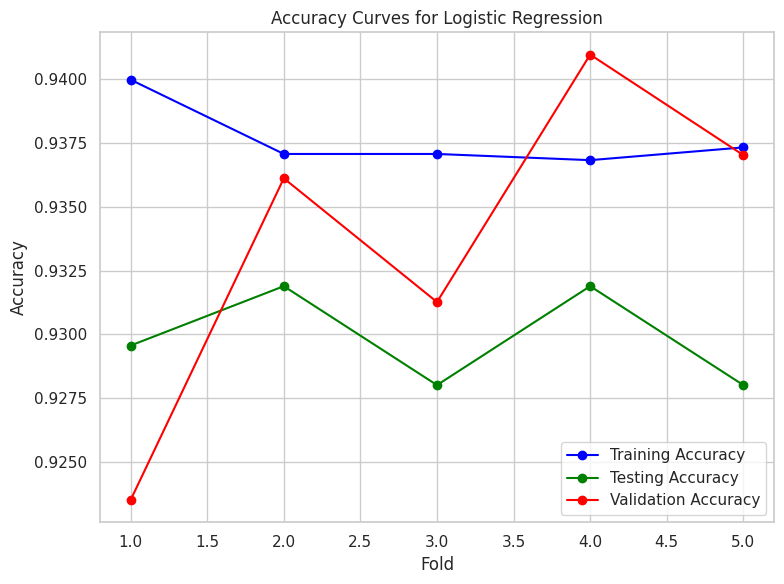

In [99]:
# Initialize lists to store accuracy scores
train_accuracy = []
test_accuracy = []
val_accuracy = []

# Loop through each fold in K-fold cross-validation
for train_index, test_index in kf.split(xr_train):
    # Split the data into training and testing sets
    X_train_fold, X_test_fold = xr_train.iloc[train_index], xr_train.iloc[test_index]
    y_train_fold, y_test_fold = yr_train.iloc[train_index], yr_train.iloc[test_index]

    # Train the best Logistic Regression model
    best_log_reg_model.fit(X_train_fold, y_train_fold)

    # Calculate training accuracy
    train_acc = best_log_reg_model.score(X_train_fold, y_train_fold)
    train_accuracy.append(train_acc)

    # Calculate testing accuracy
    test_acc = best_log_reg_model.score(xr_test, yr_test)
    test_accuracy.append(test_acc)

    # Calculate validation accuracy
    val_acc = best_log_reg_model.score(X_test_fold, y_test_fold)
    val_accuracy.append(val_acc)

# Generate the x-axis values (fold numbers)
folds = np.arange(1, kf.get_n_splits() + 1)

# Plotting the accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(folds, train_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(folds, test_accuracy, label='Testing Accuracy', marker='o', color='green')
plt.plot(folds, val_accuracy, label='Validation Accuracy', marker='o', color='red')

# Adding labels, title, and legend
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves for Logistic Regression')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [119]:
# Predict the labels of the test data using the final model
yr_pred_log_reg = best_log_reg_model.predict(xr_test)

# Calculate the accuracy
accuracy_log_reg = accuracy_score(yr_test, yr_pred_log_reg)

print("Accuracy of the final logistic regression model:", accuracy_log_reg)

classification_rep_log_reg = classification_report(yr_test, yr_pred_log_reg)

print("\nLogistic Regression - Classification Report:")
print(classification_rep_log_reg)

Accuracy of the final logistic regression model: 0.9280185758513931

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       558
           1       0.94      0.94      0.94       734

    accuracy                           0.93      1292
   macro avg       0.93      0.93      0.93      1292
weighted avg       0.93      0.93      0.93      1292



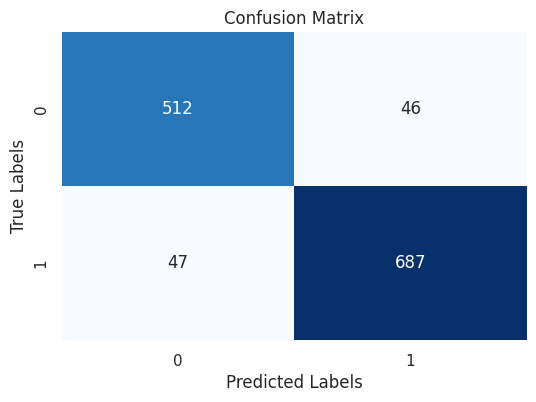

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions on test set
yr_pred = best_log_reg_model.predict(xr_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(yr_test, yr_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<font size="4" color="purple" align="center"><b>Model4: Build a Machine Learning Model using Naive Bayes</b></font>
</b></font>

*By Sharmila*<br>

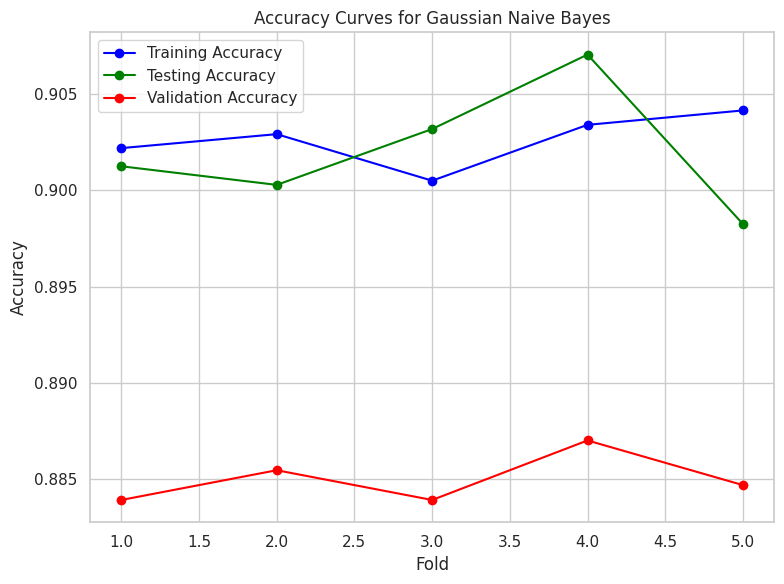

In [115]:
# Split the training data into training and validation sets
xr_train, xr_val, yr_train, yr_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Initialize lists to store accuracy scores for each fold
train_accuracy = []
test_accuracy = []
val_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(xr_train):
    X_train_fold, X_test_fold = xr_train.iloc[train_index], xr_train.iloc[test_index]
    y_train_fold, y_test_fold = yr_train.iloc[train_index], yr_train.iloc[test_index]

    # Fit the classifier
    nb_classifier.fit(X_train_fold, y_train_fold)

    # Calculate training accuracy
    train_acc = nb_classifier.score(X_train_fold, y_train_fold)
    train_accuracy.append(train_acc)

    # Calculate testing accuracy
    test_acc = nb_classifier.score(X_test_fold, y_test_fold)
    test_accuracy.append(test_acc)

    # Predict on validation set
    y_val_pred = nb_classifier.predict(xr_val)

    # Calculate validation accuracy
    val_acc = accuracy_score(yr_val, y_val_pred)
    val_accuracy.append(val_acc)

# Generate the x-axis values (fold numbers)
folds = np.arange(1, kf.get_n_splits() + 1)

# Plotting the accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(folds, train_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(folds, test_accuracy, label='Testing Accuracy', marker='o', color='green')
plt.plot(folds, val_accuracy, label='Validation Accuracy', marker='o', color='red')

# Adding labels, title, and legend
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves for Gaussian Naive Bayes')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [124]:
# Predict on the test set
y_test_pred = nb_classifier.predict(xr_test)

# Calculate accuracy on the test set
test_accuracy_nb = accuracy_score(yr_test, y_test_pred)
print("Test Accuracy:", test_accuracy_nb)

# Print the classification report
print("\nClassification Report:")
print(classification_report(yr_test, y_test_pred))


Test Accuracy: 0.891640866873065

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       558
           1       0.92      0.88      0.90       734

    accuracy                           0.89      1292
   macro avg       0.89      0.89      0.89      1292
weighted avg       0.89      0.89      0.89      1292



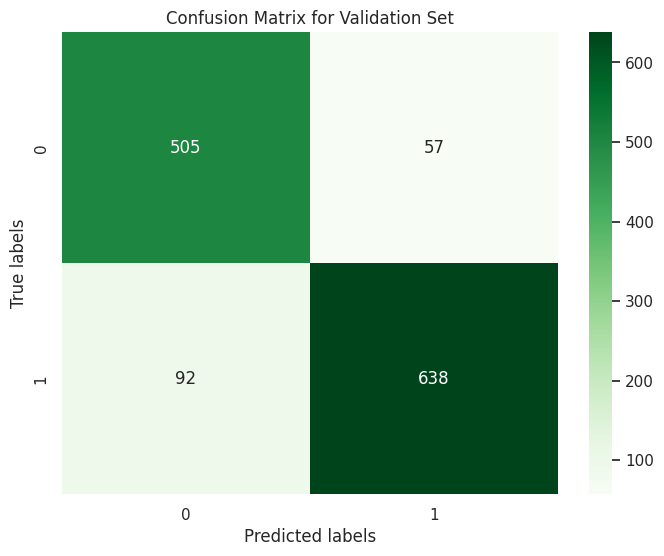

In [122]:
# Calculate confusion matrix for validation set
conf_matrix_val = confusion_matrix(yr_val, y_val_pred)

# Plotting the heatmap for validation set confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Validation Set')
plt.show()

<font size="4" color="purple" align="center"><b> Comparison of roc for Different Models</b></font>

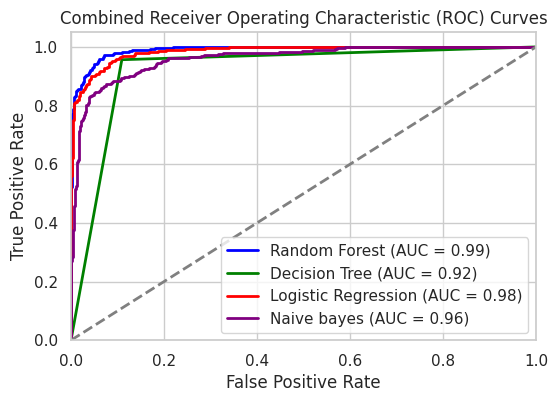

In [123]:
# Predict probabilities for the positive class (class 1) for both model
rf_probs_sm = best_rf_model.predict_proba(xr_test)[:, 1]
yr_probs = best_dt_model.predict_proba(xr_test)[:, 1]
yl_probs = best_log_reg_model.predict_proba(xr_test)[:, 1]
yn_probs = nb_classifier.predict_proba(xr_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for both model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(yr_test, rf_probs_sm)
fpr, tpr, thresholds = roc_curve(yr_test, yr_probs)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(yr_test, yl_probs)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(yr_test, yn_probs)

# Calculate the area under the ROC curve (AUC) for both model
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc = auc(fpr, tpr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr, tpr, color='green', lw=2, label='Decision Tree (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label='Naive bayes (AUC = {:.2f})'.format(roc_auc_nb))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

<font size="4" color="purple" align="center"><b>Visualization of findings as by table and plot</b></font>

Model Comparison: Accuracy
                    Model  Accuracy
0  RandomForestClassifier  0.950464
1      LogisticRegression  0.928019
2           Decision Tree  0.928019
3             Naive Bayes  0.891641


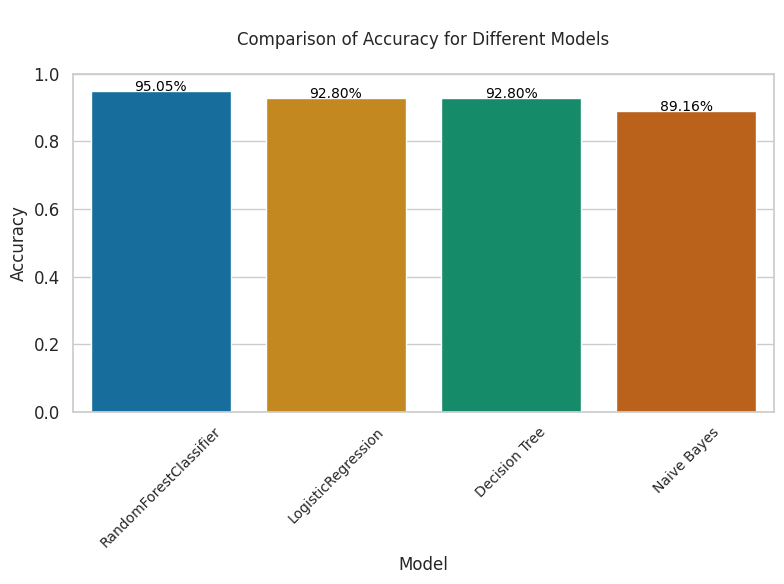

In [125]:
# Create a DataFrame with model names and accuracy values
results_df = pd.DataFrame({
    'Model': ["RandomForestClassifier", "LogisticRegression", "Decision Tree", "Naive Bayes"],
    'Accuracy': [rf_accuracy_sm, accuracy_log_reg, accuracy_dt, test_accuracy_nb]
})

# Print a heading
print("Model Comparison: Accuracy")

# Display the DataFrame
print(results_df)

# Set the style
sns.set_style("whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='colorblind', hue='Model', dodge=False, legend=False)
plt.title('\nComparison of Accuracy for Different Models\n', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)

# Add accuracy values as text annotations to each bar
for index, row in results_df.iterrows():
    plt.text(index, row['Accuracy'], f'{row["Accuracy"]:.2%}', color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()


<font size="4" color="purple" align="center"><b>Best Model findings by Accuracy</b></font>

In [ ]:
# Determine the best model by Accuracy
best_model = results_df.loc[results_df['Accuracy'].idxmax()]

# Display the result
print("The best model is:", best_model['Model'])

The best model is: RandomForestClassifier


<font size="4" color="darkblue" align="center"><b>Model Comparison Summary</b></font>

The RandomForestClassifier achieved the highest accuracy of approximately 95.81%, making it the best-performing model among the four evaluated.

**Pickle File**

In [ ]:
import pickle
# Serialize and save the trained model to a file using pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(lr_classifier, file)

In [ ]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import pickle
# Serialize and save the trained model to a file using pickle
with open('trained_model_lr.pkl', 'wb') as file:
    pickle.dump( lr_classifier, file)
    file.close()

In [ ]:
load_model = pickle.load(open('trained_model_lr.pkl','rb'))

In [ ]:
load_model.score(xr_test,yr_test)

0.9140201394268009